# Transgrancanaria 2023 Classic 
*25 February 2023*

In [1]:
import sys
import pandas as pd
sys.path.append('../src/')
from results.results import Results
from scraper.scraper import LiveTrailScraper

INFO: PACKAGE_DIR_PATH = /VSCode/personnel/MLTrail
INFO: DATA_DIR_PATH = /VSCode/personnel/MLTrail/data


In [2]:
# Data downloaded already (check scraper notebook)
raw_results = pd.read_csv('../data/csv/transgrancanaria/transgrancanaria_classic_2023.csv', sep=',')
#raw_results = pd.read_csv('../data/transgrancanaria/transgrancanaria_advance_2023.csv', sep=',')

# Let's get the Control Points information
events = ['transgrancanaria']
years = ['2023']
scr = LiveTrailScraper(events=events, years=years)
control_points, _ = scr.get_control_points()
control_points = control_points['classic']


waves = True # some races have different departure times
if '00' not in raw_results.columns:  # if results do not contain starting time
    waves = False
    control_points.pop(next(iter(control_points)))  # Remove 1st CP (starting line)

raw_results.columns = list(raw_results.columns[:5]) + list(control_points.keys())
times = raw_results[control_points.keys()]
race_info = scr.get_race_info(bib_n=raw_results.iloc[0]['doss'])


/VSCode/personnel/MLTrail/src/scraper/scraper.py:353: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  soup = BeautifulSoup(data, 'lxml')


In [3]:
raw_results.head()

,n,doss,nom,prenom,cat,Salida Cla,Tenoya,Arucas,Teror,Fontanales,El Hornill,Artenara,Tejeda,Roque Nubl,Garañon,Tunte,Ayagaures,Meta Parqu
0,1,5,SIMON AYMERICH,Andreu,MA30H,00:00:13,00:49:27,01:33:37,02:48:50,04:09:20,05:20:20,06:59:50,08:24:31,09:45:43,10:09:25,11:22:00,12:29:37,13:39:46
1,2,14,ARSÉNIO,Miguel,EL H,00:00:13,00:51:13,01:36:42,02:52:18,04:14:16,05:28:13,07:12:03,08:34:43,09:50:27,10:12:13,11:26:32,12:34:22,13:44:50
2,3,17,GREEN,Tyler,MA30H,00:00:13,00:50:46,01:35:19,02:52:42,04:14:19,05:28:31,07:09:21,08:36:47,NaN,10:20:43,11:38:20,12:52:21,14:06:59
3,4,18,BUTACI,Raul,MA30H,00:00:13,00:49:34,01:33:48,02:49:13,04:10:40,05:19:47,06:58:30,08:27:01,09:51:18,10:16:20,11:35:38,12:54:03,14:15:53
4,5,1,CAPELL GIL,Pau,MA30H,00:00:13,00:49:32,01:34:13,02:51:44,04:14:25,05:28:59,07:09:50,08:38:52,10:01:31,10:26:54,11:52:23,13:09:01,14:22:28


In [4]:
control_points

{'Salida Cla': (0.0, 0, 0),
 'Tenoya': (11.43, 348, -188),
 'Arucas': (19.44, 704, -482),
 'Teror': (31.95, 1509, -922),
 'Fontanales': (43.55, 2463, -1461),
 'El Hornill': (53.51, 3089, -2339),
 'Artenara': (67.11, 4156, -2961),
 'Tejeda': (79.63, 4919, -3878),
 'Roque Nubl': (88.15, 5869, -4128),
 'Garañon': (91.32, 6042, -4372),
 'Tunte': (104.26, 6369, -5483),
 'Ayagaures': (116.57, 6803, -6500),
 'Meta Parqu': (130.74, 7000, -6970)}

In [5]:
rs = Results(control_points=control_points, times=times, offset=race_info['hd'],
                clean_days=False, start_day=int(race_info['jd']), waves=waves)


In [6]:
rs.times

,Salida Cla,Tenoya,Arucas,Teror,Fontanales,El Hornill,Artenara,Tejeda,Roque Nubl,Garañon,Tunte,Ayagaures,Meta Parqu
0,0:00:13,0:49:27,1:33:37,2:48:50,4:09:20,5:20:20,6:59:50,8:24:31,9:45:43,10:09:25,11:22:00,12:29:37,13:39:46
1,0:00:13,0:51:13,1:36:42,2:52:18,4:14:16,5:28:13,7:12:03,8:34:43,9:50:27,10:12:13,11:26:32,12:34:22,13:44:50
2,0:00:13,0:50:46,1:35:19,2:52:42,4:14:19,5:28:31,7:09:21,8:36:47,9:28:45,10:20:43,11:38:20,12:52:21,14:06:59
3,0:00:13,0:49:34,1:33:48,2:49:13,4:10:40,5:19:47,6:58:30,8:27:01,9:51:18,10:16:20,11:35:38,12:54:03,14:15:53
4,0:00:13,0:49:32,1:34:13,2:51:44,4:14:25,5:28:59,7:09:50,8:38:52,10:01:31,10:26:54,11:52:23,13:09:01,14:22:28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,0:00:13,1:26:04,2:50:17,5:41:11,8:19:01,11:12:06,14:39:05,17:47:56,19:36:15,20:10:23,23:05:33,"1 day, 1:57:34","1 day, 5:47:14"
334,0:00:13,1:24:59,2:48:45,5:27:58,7:55:14,10:19:50,13:26:09,16:37:33,19:04:33,19:51:23,23:19:40,"1 day, 2:16:54","1 day, 5:48:19"
335,0:00:13,1:17:34,2:28:35,4:48:21,7:11:10,9:35:29,12:53:51,16:02:34,18:41:08,19:36:36,22:48:22,"1 day, 1:59:10","1 day, 5:48:49"
336,0:00:13,1:20:43,2:41:12,5:12:05,7:43:17,10:14:53,13:31:40,17:04:12,19:31:15,20:16:01,23:09:21,"1 day, 2:09:48","1 day, 5:52:12"


In [7]:
rs.paces

,Salida Cla,Tenoya,Arucas,Teror,Fontanales,El Hornill,Artenara,Tejeda,Roque Nubl,Garañon,Tunte,Ayagaures,Meta Parqu
0,0:04:18,0:04:18,0:05:30,0:06:00,0:06:56,0:07:07,0:07:18,0:06:45,0:09:31,0:07:28,0:05:36,0:05:29,0:04:57
1,0:04:27,0:04:27,0:05:40,0:06:02,0:07:03,0:07:25,0:07:38,0:06:36,0:08:53,0:06:51,0:05:44,0:05:30,0:04:58
2,0:04:25,0:04:25,0:05:33,0:06:11,0:07:02,0:07:26,0:07:24,0:06:59,0:06:05,0:16:23,0:05:59,0:06:00,0:05:16
3,0:04:19,0:04:19,0:05:31,0:06:01,0:07:01,0:06:56,0:07:15,0:07:04,0:09:53,0:07:53,0:06:07,0:06:22,0:05:46
4,0:04:18,0:04:18,0:05:34,0:06:11,0:07:07,0:07:29,0:07:24,0:07:06,0:09:42,0:08:00,0:06:36,0:06:13,0:05:11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,0:07:30,0:07:30,0:10:30,0:13:39,0:13:36,0:17:22,0:15:13,0:15:05,0:12:42,0:10:46,0:13:32,0:13:58,0:16:12
334,0:07:24,0:07:24,0:10:27,0:12:43,0:12:41,0:14:31,0:13:41,0:15:17,0:17:15,0:14:46,0:16:05,0:14:23,0:14:55
335,0:06:46,0:06:46,0:08:51,0:11:10,0:12:18,0:14:29,0:14:35,0:15:04,0:18:36,0:17:29,0:14:49,0:15:29,0:16:12
336,0:07:02,0:07:02,0:10:02,0:12:03,0:13:02,0:15:13,0:14:28,0:16:58,0:17:15,0:14:07,0:13:23,0:14:39,0:15:41


In [8]:
# Normalized paces are paces adjusted to positive elevation gain
# Each 100m climb adds a km for pace computation
rs.paces_norm

,Salida Cla,Tenoya,Arucas,Teror,Fontanales,El Hornill,Artenara,Tejeda,Roque Nubl,Garañon,Tunte,Ayagaures,Meta Parqu
0,0:03:18,0:03:18,0:03:49,0:03:39,0:03:48,0:04:22,0:04:05,0:04:12,0:04:30,0:04:50,0:04:28,0:04:03,0:04:20
1,0:03:25,0:03:25,0:03:55,0:03:40,0:03:52,0:04:33,0:04:16,0:04:06,0:04:12,0:04:26,0:04:35,0:04:04,0:04:21
2,0:03:23,0:03:23,0:03:51,0:03:45,0:03:51,0:04:34,0:04:09,0:04:20,0:02:53,0:10:36,0:04:47,0:04:26,0:04:37
3,0:03:18,0:03:18,0:03:49,0:03:40,0:03:51,0:04:15,0:04:04,0:04:23,0:04:40,0:05:06,0:04:53,0:04:42,0:05:04
4,0:03:18,0:03:18,0:03:51,0:03:46,0:03:54,0:04:35,0:04:09,0:04:25,0:04:35,0:05:10,0:05:16,0:04:36,0:04:33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,0:05:45,0:05:45,0:07:16,0:08:18,0:07:27,0:10:40,0:08:31,0:09:22,0:06:00,0:06:57,0:10:48,0:10:19,0:14:13
334,0:05:41,0:05:41,0:07:14,0:07:44,0:06:57,0:08:54,0:07:40,0:09:29,0:08:09,0:09:33,0:12:50,0:10:38,0:13:05
335,0:05:11,0:05:11,0:06:08,0:06:47,0:06:45,0:08:53,0:08:10,0:09:21,0:08:47,0:11:19,0:11:49,0:11:27,0:14:13
336,0:05:23,0:05:23,0:06:57,0:07:20,0:07:09,0:09:20,0:08:06,0:10:32,0:08:09,0:09:08,0:10:41,0:10:50,0:13:46


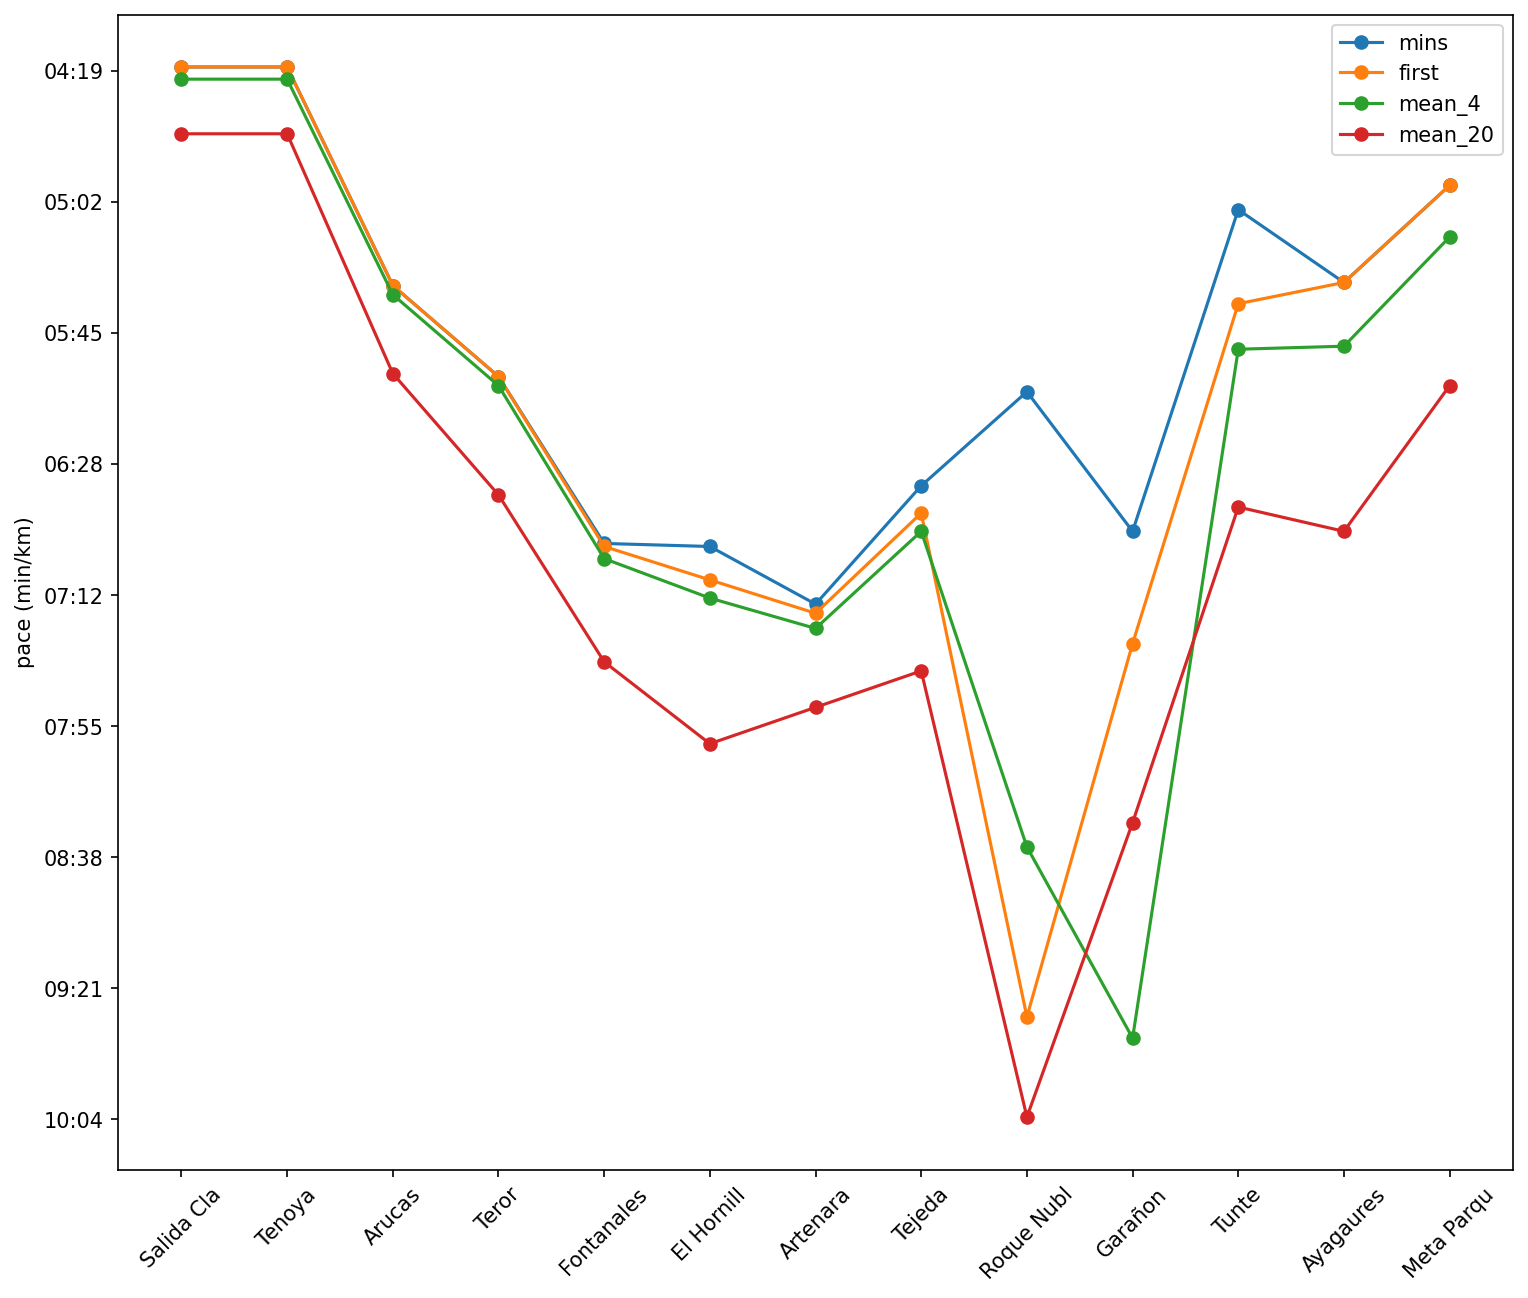

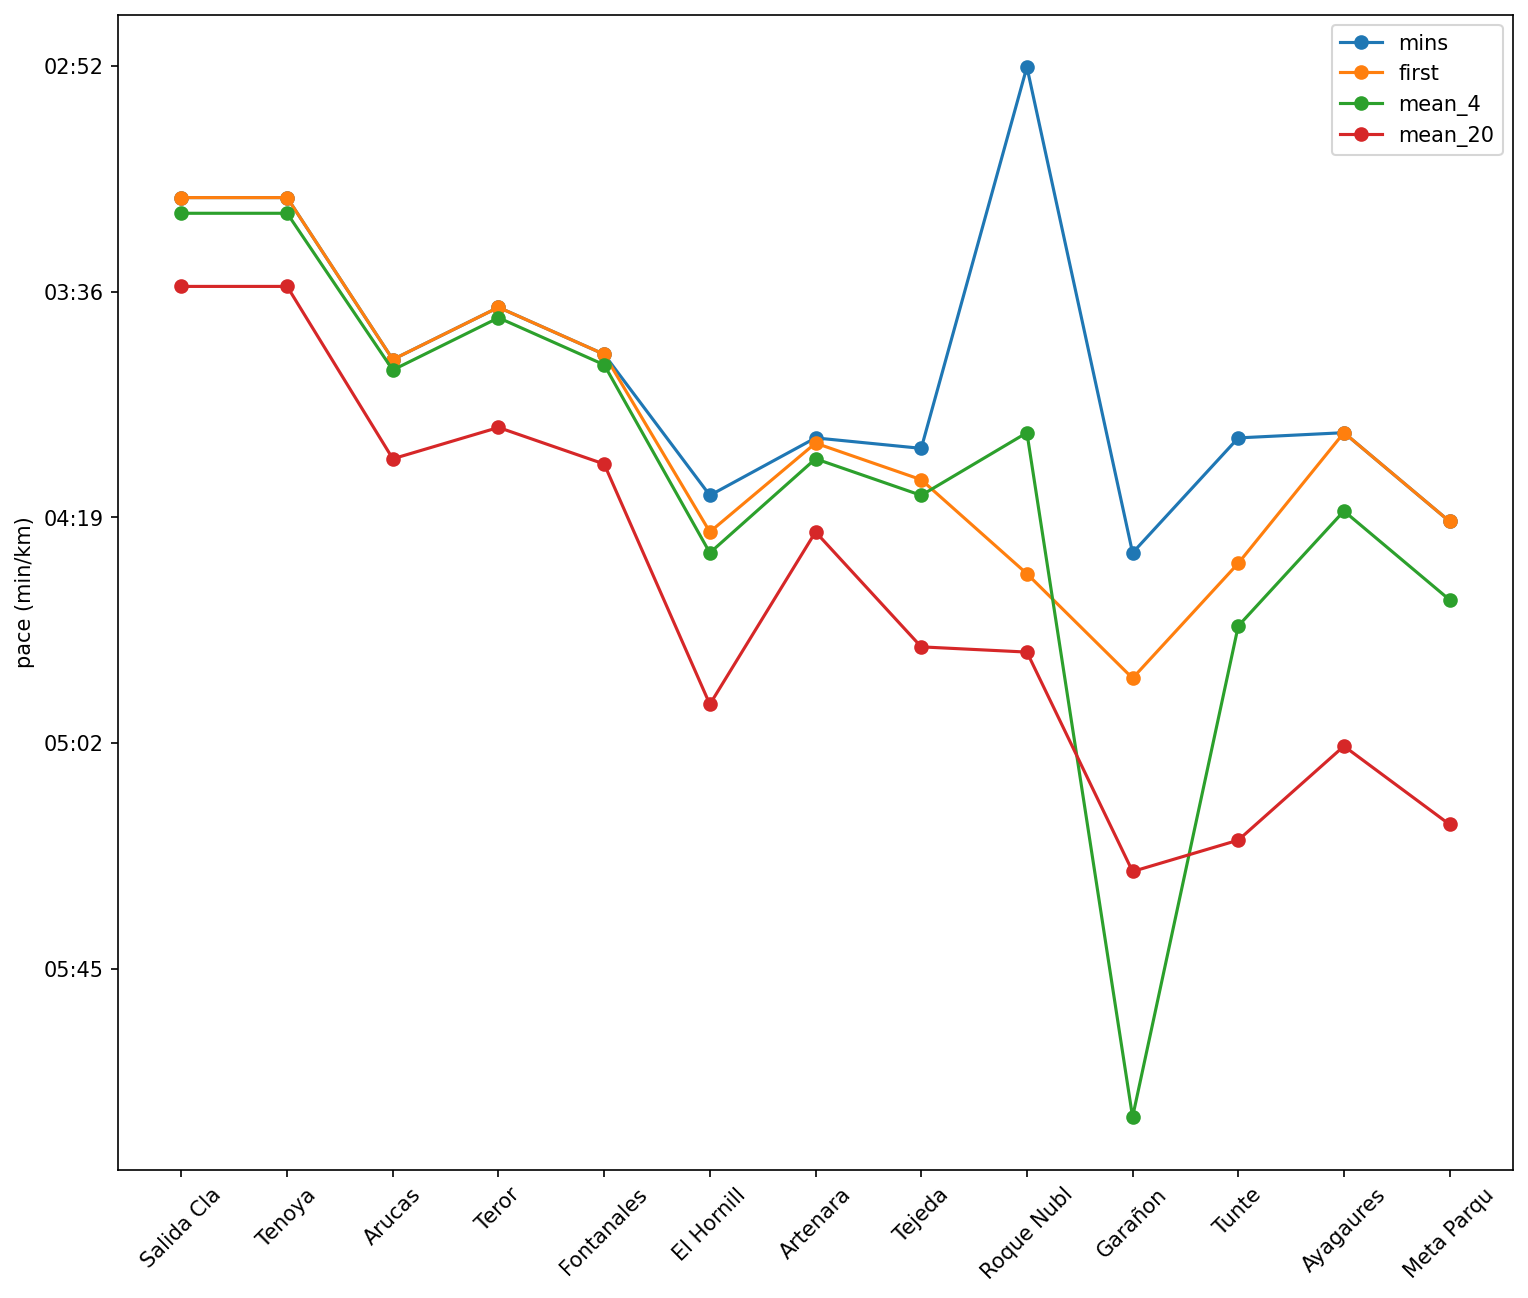

In [9]:
rs.plot_control_points(rs.get_stats(), xrotate=True, inverty=True)
rs.plot_control_points(rs.get_stats_norm(), xrotate=True, inverty=True)

## Objective analysis

Choose the participant closest to your target time, entering his final position. Graph shows the mean paces or times for the 5 people closest to that time.

In [10]:
objective_position = rs.get_closest_time_to_objective('15:00:00')
rs.set_objective(objective_position)
obj = rs.get_objective_paces()
mean_obj = rs.get_objective_mean_paces()

In [11]:
rs.paces.loc[objective_position-2:objective_position+2]

,Salida Cla,Tenoya,Arucas,Teror,Fontanales,El Hornill,Artenara,Tejeda,Roque Nubl,Garañon,Tunte,Ayagaures,Meta Parqu
6,0:04:44,0:04:44,0:06:09,0:06:33,0:07:23,0:07:47,0:07:25,0:06:53,0:09:16,0:07:19,0:06:11,0:06:30,0:05:46
7,0:04:22,0:04:22,0:05:41,0:06:22,0:07:19,0:07:26,0:07:38,0:07:10,0:09:45,0:07:52,0:06:31,0:06:57,0:06:08
8,0:04:23,0:04:23,0:05:36,0:06:16,0:06:55,0:08:03,0:07:39,0:07:11,0:09:45,0:07:56,0:06:23,0:07:12,0:06:27
9,0:04:48,0:04:48,0:06:13,0:06:47,0:07:51,0:08:13,0:07:37,0:07:37,0:09:34,0:07:22,0:05:56,0:06:19,0:06:15
10,0:04:51,0:04:51,0:06:07,0:06:48,0:07:37,0:07:53,0:07:28,0:07:15,0:10:11,0:07:31,0:06:38,0:07:08,0:05:32


In [12]:
rs.times

,Salida Cla,Tenoya,Arucas,Teror,Fontanales,El Hornill,Artenara,Tejeda,Roque Nubl,Garañon,Tunte,Ayagaures,Meta Parqu
0,0:00:13,0:49:27,1:33:37,2:48:50,4:09:20,5:20:20,6:59:50,8:24:31,9:45:43,10:09:25,11:22:00,12:29:37,13:39:46
1,0:00:13,0:51:13,1:36:42,2:52:18,4:14:16,5:28:13,7:12:03,8:34:43,9:50:27,10:12:13,11:26:32,12:34:22,13:44:50
2,0:00:13,0:50:46,1:35:19,2:52:42,4:14:19,5:28:31,7:09:21,8:36:47,9:28:45,10:20:43,11:38:20,12:52:21,14:06:59
3,0:00:13,0:49:34,1:33:48,2:49:13,4:10:40,5:19:47,6:58:30,8:27:01,9:51:18,10:16:20,11:35:38,12:54:03,14:15:53
4,0:00:13,0:49:32,1:34:13,2:51:44,4:14:25,5:28:59,7:09:50,8:38:52,10:01:31,10:26:54,11:52:23,13:09:01,14:22:28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,0:00:13,1:26:04,2:50:17,5:41:11,8:19:01,11:12:06,14:39:05,17:47:56,19:36:15,20:10:23,23:05:33,"1 day, 1:57:34","1 day, 5:47:14"
334,0:00:13,1:24:59,2:48:45,5:27:58,7:55:14,10:19:50,13:26:09,16:37:33,19:04:33,19:51:23,23:19:40,"1 day, 2:16:54","1 day, 5:48:19"
335,0:00:13,1:17:34,2:28:35,4:48:21,7:11:10,9:35:29,12:53:51,16:02:34,18:41:08,19:36:36,22:48:22,"1 day, 1:59:10","1 day, 5:48:49"
336,0:00:13,1:20:43,2:41:12,5:12:05,7:43:17,10:14:53,13:31:40,17:04:12,19:31:15,20:16:01,23:09:21,"1 day, 2:09:48","1 day, 5:52:12"


In [13]:
mean_obj_times = rs.get_objective_mean_times()
mean_obj_times


,Salida Cla,Tenoya,Arucas,Teror,Fontanales,El Hornill,Artenara,Tejeda,Roque Nubl,Garañon,Tunte,Ayagaures,Meta Parqu
0,0:00:13,0:52:33,1:39:58,3:01:18,4:26:49,5:45:19,7:28:29,8:58:56,10:20:42,10:44:54,12:05:58,13:29:03,14:56:22


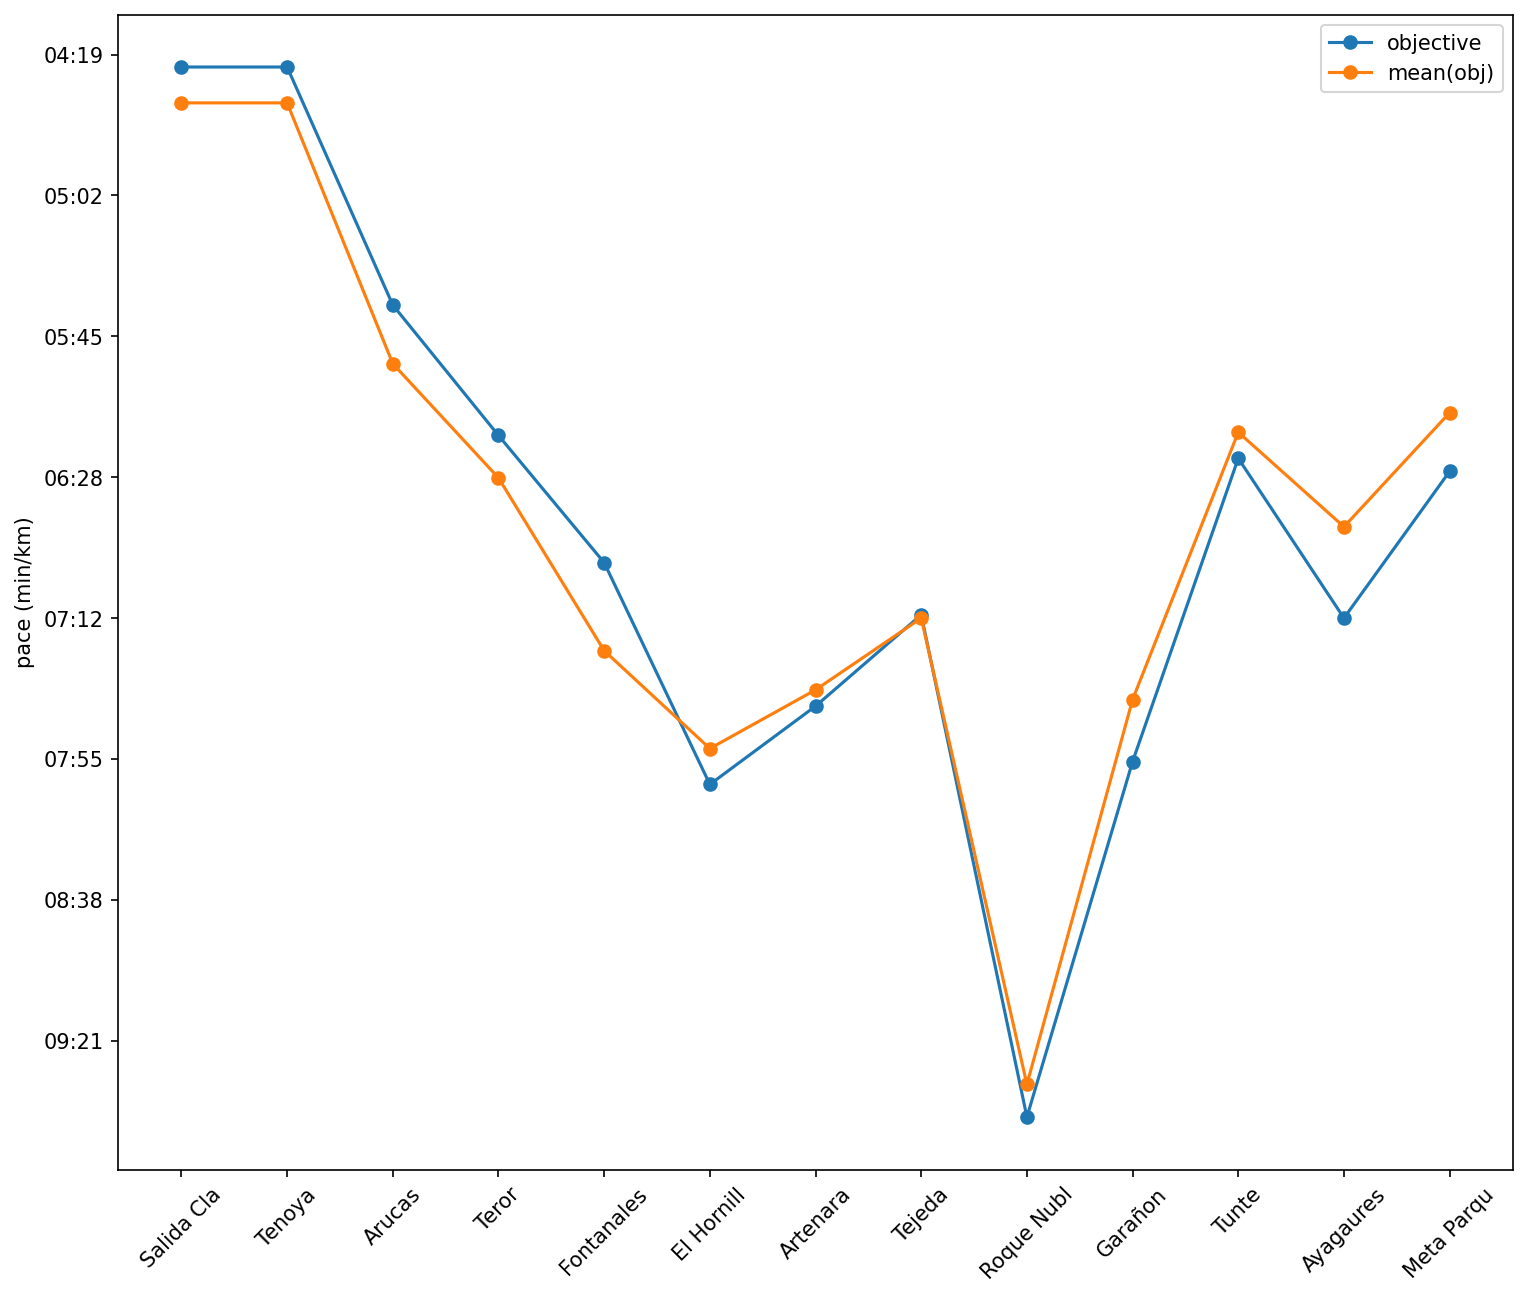

In [14]:
index = ['objective','mean(obj)']
paces = pd.concat([obj,mean_obj], ignore_index=True)
paces['index'] = index
paces.set_index('index', inplace=True)

rs.plot_control_points(paces, xrotate=True, inverty=True)


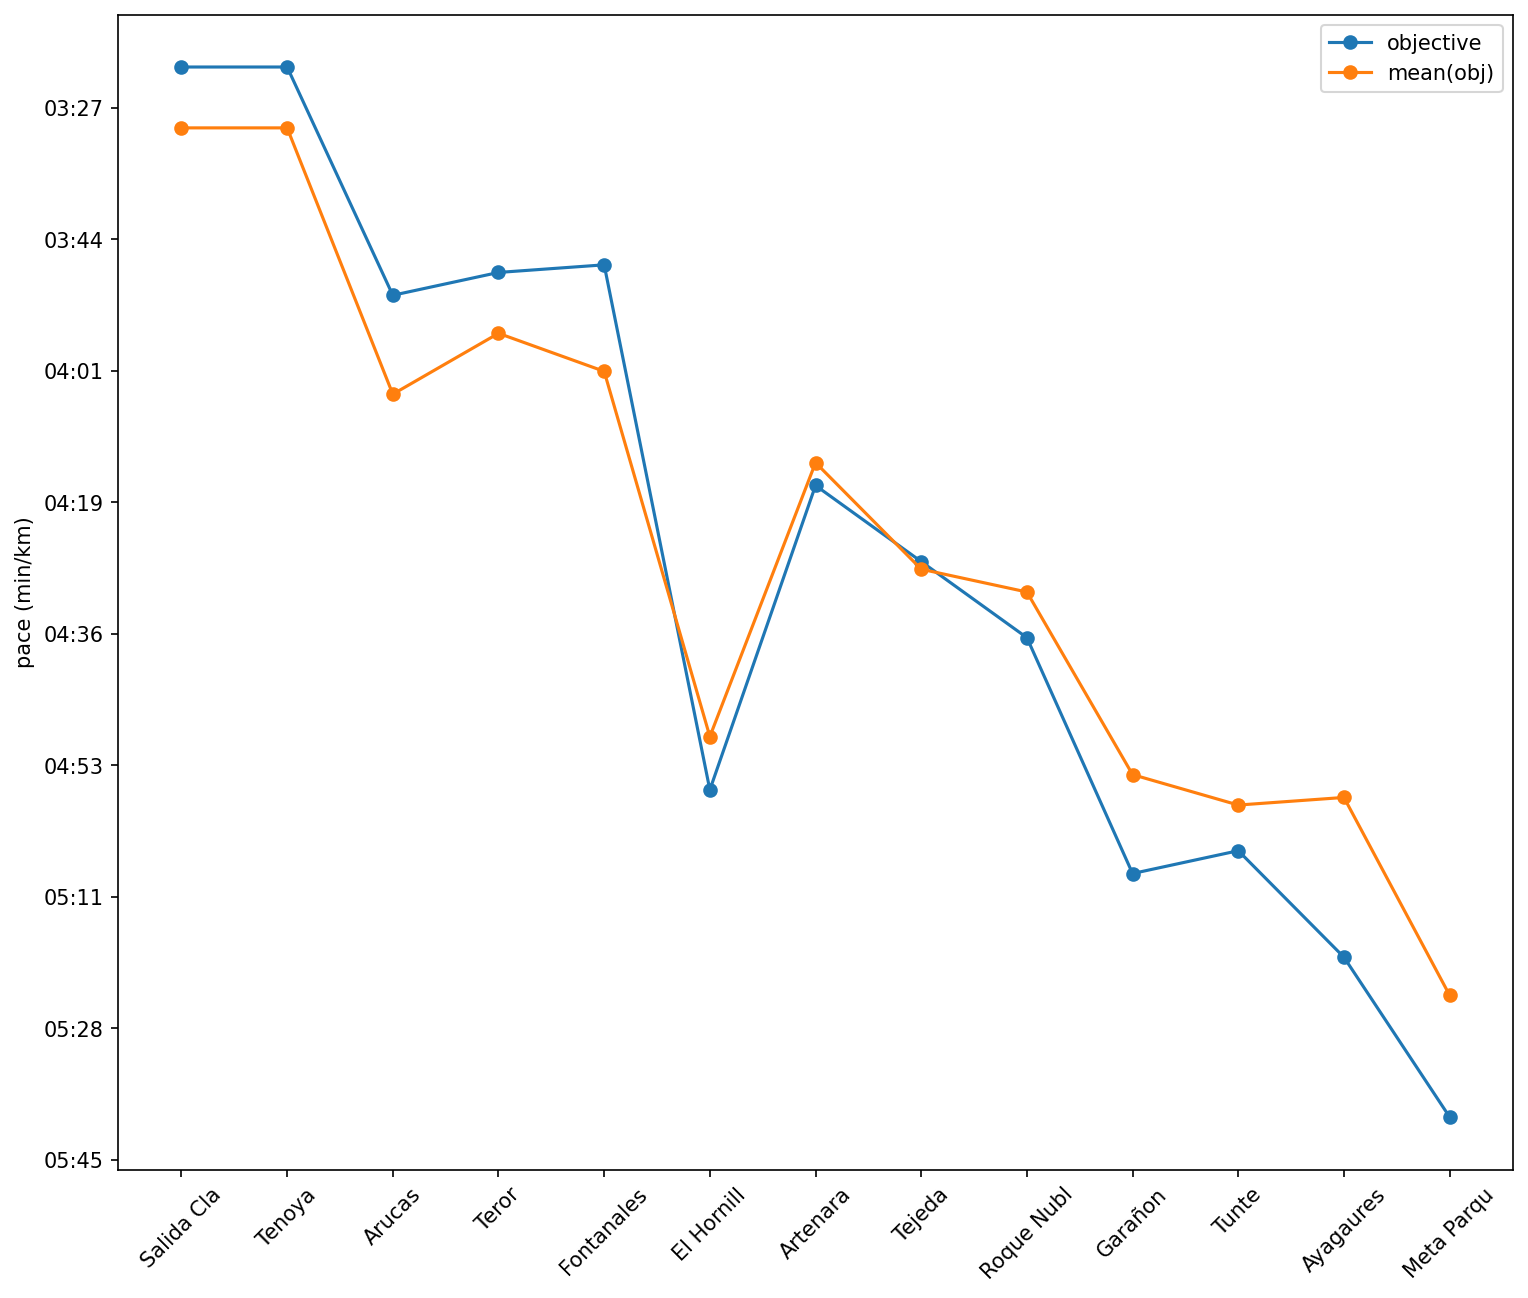

In [15]:
index = ['objective','mean(obj)']
paces = pd.concat([rs.get_objective_paces_norm(), rs.get_objective_mean_paces_norm()], ignore_index=True)
paces['index'] = index
paces.set_index('index',inplace=True)

rs.plot_control_points(paces,xrotate=True,inverty=True)


In [16]:
table_objs=[]
for t in ['25:00:00', '26:00:00', '27:00:00']:
    objective_position = rs.get_closest_time_to_objective(t)
    rs.set_objective(objective_position)
    obj = rs.get_objective_paces()
    mean_obj = rs.get_objective_mean_times()
    table_objs.append(mean_obj)
#mean_obj[mean_obj.columns[:7]]

index = ['25h', '26h', '27h']

mean_obj = pd.concat([table_objs[0], table_objs[1], table_objs[2]],
                     ignore_index=True).rename(columns={'Meta Parque Sur' : 'Meta'})#, axis=1)
mean_obj['Objectiu'] = index
mean_obj.set_index('Objectiu',inplace=True)

mean_obj

,Salida Cla,Tenoya,Arucas,Teror,Fontanales,El Hornill,Artenara,Tejeda,Roque Nubl,Garañon,Tunte,Ayagaures,Meta Parqu
Objectiu,,,,,,,,,,,,,
25h,0:00:13,1:19:30,2:33:18,4:42:40,6:51:37,8:50:20,11:24:52,13:51:24,16:13:50,17:04:18,19:43:36,22:07:00,25:00:02
26h,0:00:13,1:10:07,2:17:34,4:27:20,6:37:37,8:41:41,11:25:03,14:11:50,16:40:58,17:24:15,20:14:38,22:55:48,25:58:58
27h,0:00:13,1:17:07,2:29:19,4:45:06,6:58:54,9:04:47,11:59:14,14:46:45,17:31:11,18:18:30,20:59:03,23:47:39,26:57:16


In [17]:
mean_obj.map(lambda x: x[:-3] if isinstance(x, str) and len(x) > 3 else x)

,Salida Cla,Tenoya,Arucas,Teror,Fontanales,El Hornill,Artenara,Tejeda,Roque Nubl,Garañon,Tunte,Ayagaures,Meta Parqu
Objectiu,,,,,,,,,,,,,
25h,0:00,1:19,2:33,4:42,6:51,8:50,11:24,13:51,16:13,17:04,19:43,22:07,25:00
26h,0:00,1:10,2:17,4:27,6:37,8:41,11:25,14:11,16:40,17:24,20:14,22:55,25:58
27h,0:00,1:17,2:29,4:45,6:58,9:04,11:59,14:46,17:31,18:18,20:59,23:47,26:57
